In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 01. HTRU2 Dataset

In [2]:
df = pd.read_csv("HTRU_2.csv", header = None, names = ['mean_integrated', 'std_dev_integrated', 'kurtosis_integrated', 'skewness_integrated', 'mean_dmsnr', 'std_dev_dmsnr', 'kurtosis_dmsnr', 'skewness_dmsnr', 'class'])

In [3]:
df.head()

mean_integrated  std_dev_integrated  kurtosis_integrated  \
0       140.562500           55.683782            -0.234571   
1       102.507812           58.882430             0.465318   
2       103.015625           39.341649             0.323328   
3       136.750000           57.178449            -0.068415   
4        88.726562           40.672225             0.600866   

   skewness_integrated  mean_dmsnr  std_dev_dmsnr  kurtosis_dmsnr  \
0            -0.699648    3.199833      19.110426        7.975532   
1            -0.515088    1.677258      14.860146       10.576487   
2             1.051164    3.121237      21.744669        7.735822   
3            -0.636238    3.642977      20.959280        6.896499   
4             1.123492    1.178930      11.468720       14.269573   

   skewness_dmsnr  class  
0       74.242225      0  
1      127.393580      0  
2       63.171909      0  
3       53.593661      0  
4      252.567306      0

In [4]:
df.shape

(17898, 9)

In [5]:
df.columns

Index(['mean_integrated', 'std_dev_integrated', 'kurtosis_integrated',
       'skewness_integrated', 'mean_dmsnr', 'std_dev_dmsnr', 'kurtosis_dmsnr',
       'skewness_dmsnr', 'class'],
      dtype='object')

In [6]:
df.isnull().sum()

mean_integrated        0
std_dev_integrated     0
kurtosis_integrated    0
skewness_integrated    0
mean_dmsnr             0
std_dev_dmsnr          0
kurtosis_dmsnr         0
skewness_dmsnr         0
class                  0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe(percentiles = [0.005, 0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99, 0.995])

mean_integrated  std_dev_integrated  kurtosis_integrated  \
count     17898.000000        17898.000000         17898.000000   
mean        111.079968           46.549532             0.477857   
std          25.652935            6.843189             1.064040   
min           5.812500           24.772042            -1.876011   
0.5%         13.573398           28.968244            -0.737330   
1%           19.233672           30.057644            -0.479133   
5%           57.491797           34.714316            -0.231671   
10%          82.958594           37.408646            -0.133219   
25%         100.929688           42.376018             0.027098   
50%         115.078125           46.947479             0.223240   
75%         127.085938           51.023202             0.473325   
90%         137.236719           54.412099             0.891816   
95%         143.072656           56.473756             2.706561   
99%         155.742891           61.975944             5.701819   
99.5%       161.477031           67.535708             6.184090   
max         192.617188           98.778911             8.069522   

       skewness_integrated    mean_dmsnr  std_dev_dmsnr  kurtosis_dmsnr  \
count         17898.000000  17898.000000   17898.000000    17898.000000   
mean              1.770279     12.614400      26.326515        8.303556   
std               6.167913     29.472897      19.470572        4.506092   
min              -1.791886      0.213211       7.370432       -3.139270   
0.5%             -1.022526      0.500811       8.765984       -1.177272   
1%               -0.833862      0.603654       9.307935       -0.875384   
5%               -0.556371      1.005853      11.082345        0.530908   
10%              -0.428868      1.306605      12.131926        1.979330   
25%              -0.188572      1.923077      14.437332        5.781506   
50%               0.198710      2.801839      18.461316        8.433515   
75%               0.927783      5.464256      28.428104       10.702959   
90%               2.765966     30.573495      59.080452       13.466038   
95%              10.138507     82.966973      74.621642       15.770680   
99%              35.463057    155.817759      91.676485       21.159269   
99.5%            41.361095    173.156212      95.405519       23.681145   
max              68.101622    223.392140     110.642211       34.539844   

       skewness_dmsnr         class  
count    17898.000000  17898.000000  
mean       104.857709      0.091574  
std        106.514540      0.288432  
min         -1.976976      0.000000  
0.5%        -1.860524      0.000000  
1%          -1.713688      0.000000  
5%          -0.499720      0.000000  
10%          2.839540      0.000000  
25%         34.960504      0.000000  
50%         83.064556      0.000000  
75%        139.309331      0.000000  
90%        220.351313      0.000000  
95%        296.379055      1.000000  
99%        517.137142      1.000000  
99.5%      629.834054      1.000000  
max       1191.000837      1.000000

In [9]:
df.dtypes

mean_integrated        float64
std_dev_integrated     float64
kurtosis_integrated    float64
skewness_integrated    float64
mean_dmsnr             float64
std_dev_dmsnr          float64
kurtosis_dmsnr         float64
skewness_dmsnr         float64
class                    int64
dtype: object

In [10]:
df['class'] = df['class'].astype('category')

In [11]:
df['class'].value_counts()

0    16259
1     1639
Name: class, dtype: int64

In [12]:
df.isin([0]).any()

mean_integrated        False
std_dev_integrated     False
kurtosis_integrated    False
skewness_integrated    False
mean_dmsnr             False
std_dev_dmsnr          False
kurtosis_dmsnr         False
skewness_dmsnr         False
class                   True
dtype: bool

### Seeing overall outliers using std dev

In [13]:
from scipy import stats

z_scores = stats.zscore(df.drop('class', axis = 1))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_new = df[filtered_entries]

In [14]:
len(df) - len(df_new)

1726

1726 outliers found. But not removed. Removing later.

In [15]:
df_new.shape

(16172, 9)

In [16]:
# df = df_new

In [17]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 42)

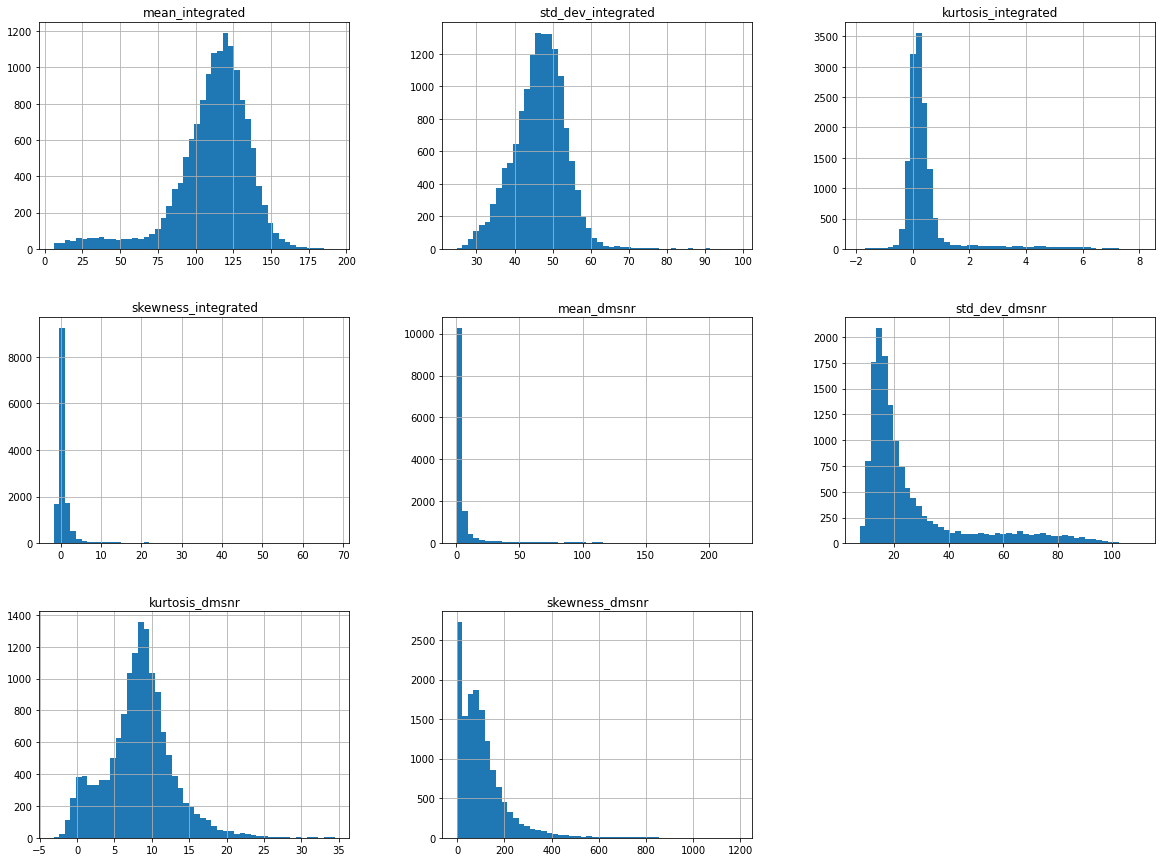

In [18]:
df_train.hist(bins = 50, figsize = (20, 15))
plt.show()

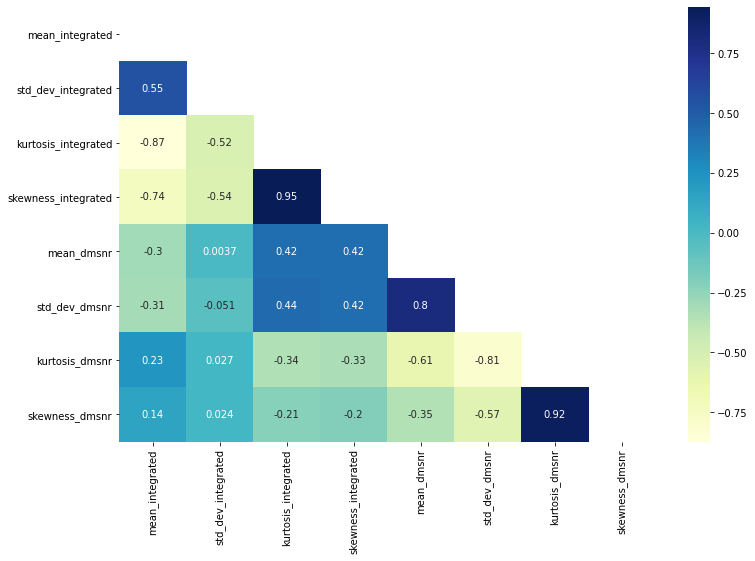

In [19]:
corr_mat = df_train.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_mat, mask = np.triu(corr_mat), cmap="YlGnBu", annot = True)
plt.show()

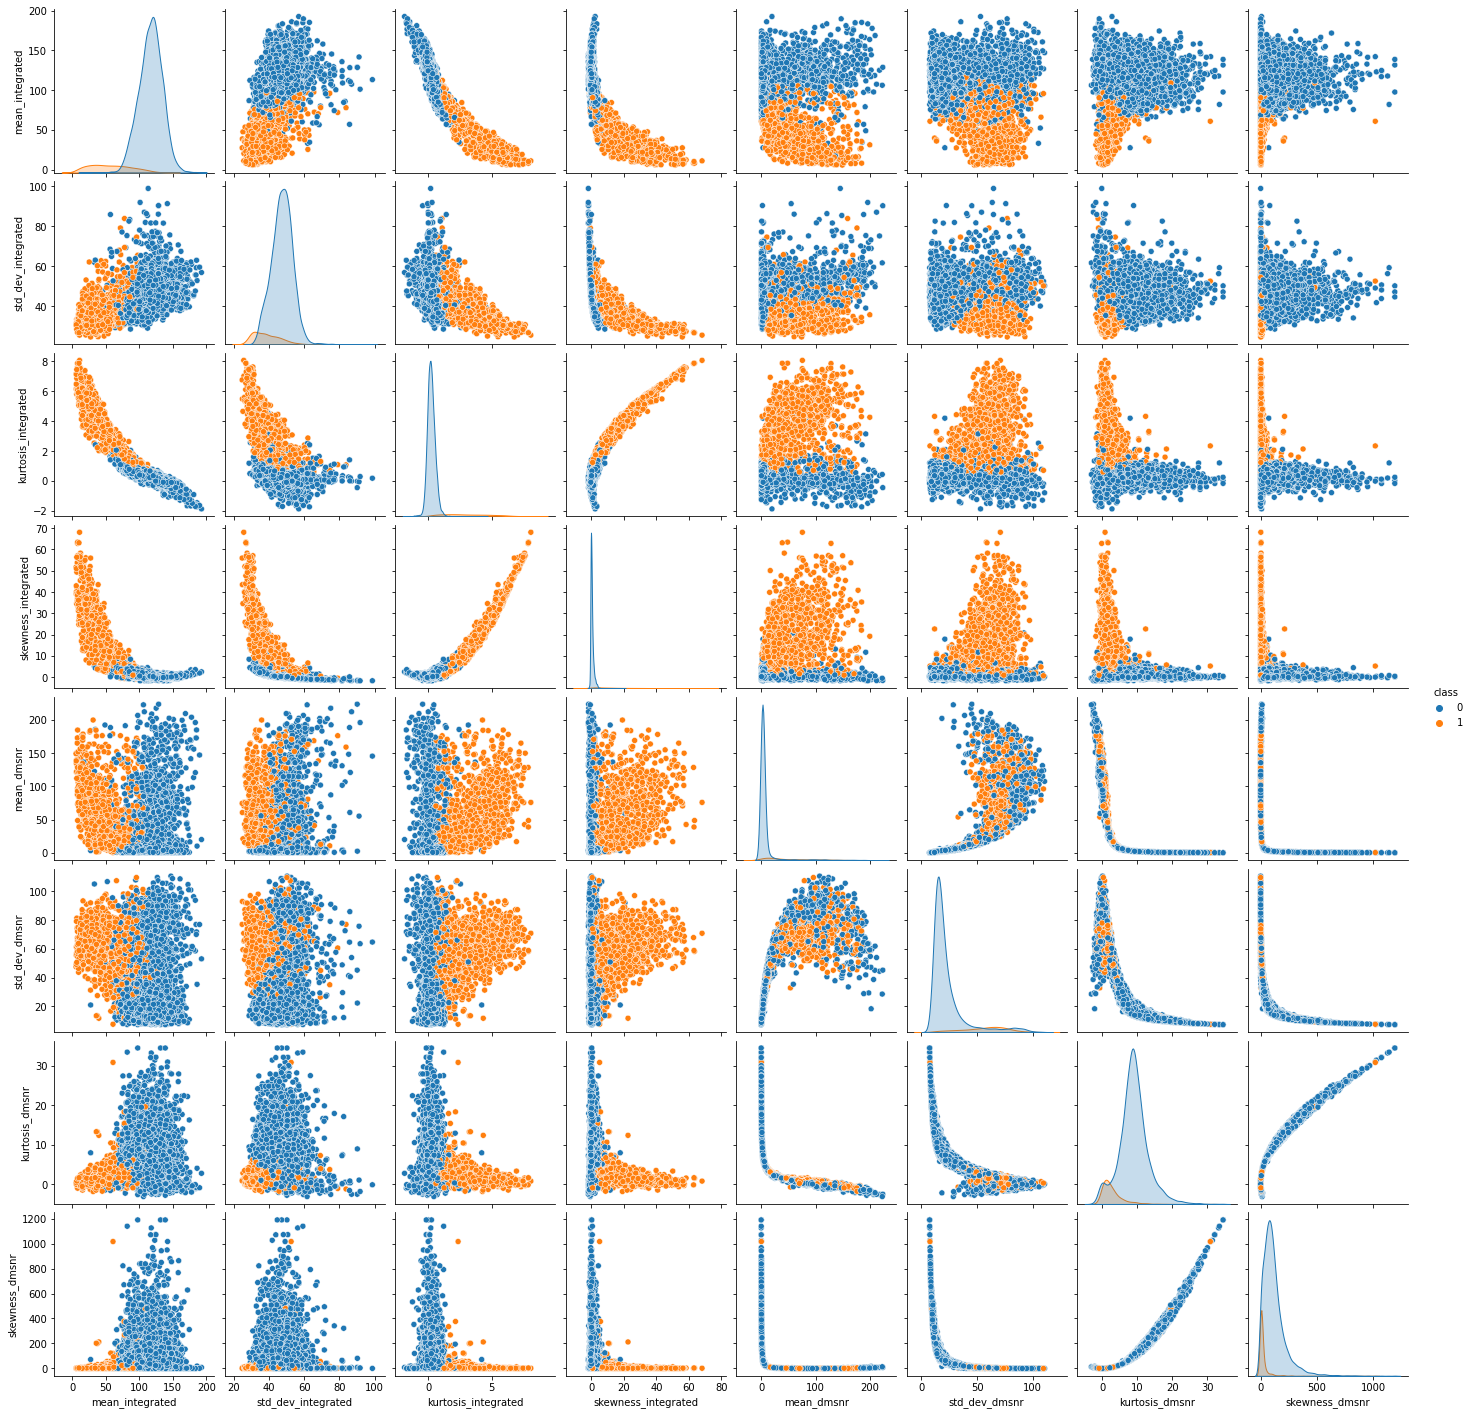

In [20]:
sns.pairplot(df_train, hue = 'class')

In [21]:
df.columns

Index(['mean_integrated', 'std_dev_integrated', 'kurtosis_integrated',
       'skewness_integrated', 'mean_dmsnr', 'std_dev_dmsnr', 'kurtosis_dmsnr',
       'skewness_dmsnr', 'class'],
      dtype='object')

<AxesSubplot:xlabel='class', ylabel='skewness_dmsnr'>

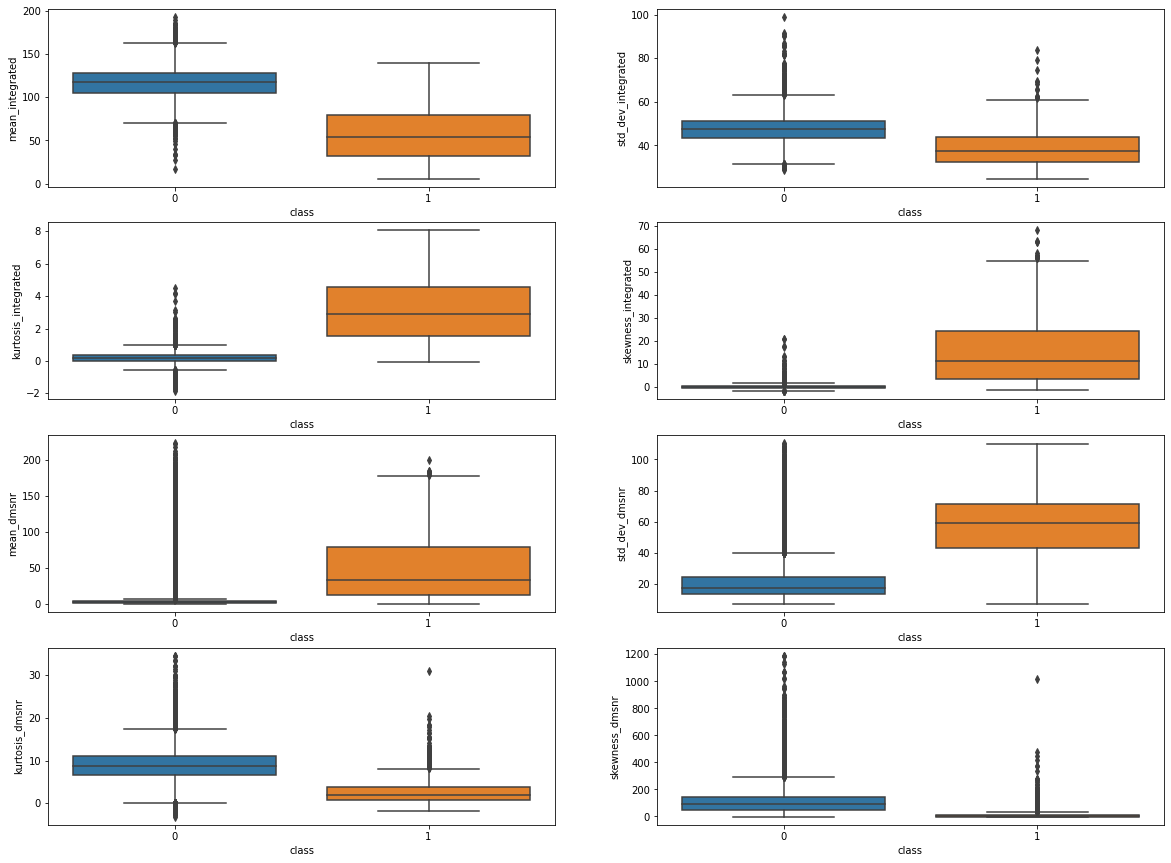

In [22]:
x = df_train['class']

fig, axes = plt.subplots(4,2, figsize=(20,15))
# fig.delaxes(axes[2][1])
sns.boxplot(y=df_train['mean_integrated'], x = x, ax=axes[0][0])
sns.boxplot(y=df_train['std_dev_integrated'], x = x, ax=axes[0][1])
sns.boxplot(y=df_train['kurtosis_integrated'], x = x, ax=axes[1][0])
sns.boxplot(y=df_train['skewness_integrated'], x = x, ax=axes[1][1])
sns.boxplot(y=df_train['mean_dmsnr'], x = x, ax=axes[2][0])
sns.boxplot(y=df_train['std_dev_dmsnr'], x = x, ax=axes[2][1])
sns.boxplot(y=df_train['kurtosis_dmsnr'], x = x, ax=axes[3][0])
sns.boxplot(y=df_train['skewness_dmsnr'], x = x, ax=axes[3][1])

In [23]:
def outlier_treatment(datacolumn, threshold):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (threshold * IQR)
    upper_range = Q3 + (threshold * IQR)
    return lower_range,upper_range

In [24]:
a = set()
for i in df_train.drop('class', axis = 1).columns:
    lower, higher = outlier_treatment(df_train[i], 3.0)
    l = df_train.loc[(df_train[i] < lower) | (df_train[i] > higher)].index
    for j in list(l):
        a.add(j)    

In [25]:
len(a) # for threshold 1.5

2405

In [26]:
df_train.drop(a, axis = 0, inplace = True)

/Users/sc47/programs/main/venv/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [27]:
df_train.shape

(11913, 9)

### Preprocess and fit without PCA

In [28]:
X_train = df_train.drop('class', axis = 1)
y_train = df_train['class']

X_test = df_test.drop('class', axis = 1)
y_test = df_test['class']

In [29]:
X_train.dtypes

mean_integrated        float64
std_dev_integrated     float64
kurtosis_integrated    float64
skewness_integrated    float64
mean_dmsnr             float64
std_dev_dmsnr          float64
kurtosis_dmsnr         float64
skewness_dmsnr         float64
dtype: object

#### MinMax scaling numerical attributes and one hot encoding the categorical attribute - Species

In [30]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
#     ('scaler', MinMaxScaler()),
    ('scaler', StandardScaler()),
    ])


num_attribs = X_train.columns

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
    ])

In [31]:
X_train_prepared = full_pipeline.fit_transform(X_train)

In [32]:
X_train_prepared.shape

(11913, 8)

In [33]:
X_test_prepared = full_pipeline.transform(X_test)

In [34]:
X_test_prepared.shape

(3580, 8)

In [35]:
X_train_prepared

array([[-0.42597331,  0.09897647, -0.11132259, ..., -0.17858063,
        -0.26030323, -0.37128079],
       [ 0.34145105,  0.69180331, -0.47664271, ..., -1.01758637,
         1.53718497,  1.58480072],
       [-0.93602689, -0.55028496,  0.029835  , ..., -0.7320919 ,
         1.52719367,  1.24636797],
       ...,
       [ 0.01000998, -0.6543924 ,  1.48309297, ..., -1.01265645,
         2.44195161,  2.43925445],
       [ 1.18810248,  0.52113774, -1.06095864, ...,  0.27782634,
        -0.59698146, -0.63996634],
       [ 0.29175833,  0.61534017,  0.41171667, ..., -0.99116184,
         2.63297257,  2.65298554]])

### Fit with Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [37]:
clf.fit(X_train_prepared, y_train)

RandomForestClassifier()

In [38]:
y_pred = clf.predict(X_test_prepared)

In [39]:
from sklearn.metrics import confusion_matrix, classification_report

In [40]:
confusion_matrix(y_test, y_pred)

array([[3223,   36],
       [  59,  262]])

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3259
           1       0.88      0.82      0.85       321

    accuracy                           0.97      3580
   macro avg       0.93      0.90      0.92      3580
weighted avg       0.97      0.97      0.97      3580



### Fit with KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(weights = 'distance')

In [43]:
clf_knn.fit(X_train_prepared, y_train)

KNeighborsClassifier(weights='distance')

In [44]:
y_pred = clf_knn.predict(X_test_prepared)

In [45]:
from sklearn.metrics import confusion_matrix, classification_report

In [46]:
confusion_matrix(y_test, y_pred)

array([[3248,   11],
       [  61,  260]])

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3259
           1       0.96      0.81      0.88       321

    accuracy                           0.98      3580
   macro avg       0.97      0.90      0.93      3580
weighted avg       0.98      0.98      0.98      3580



### Fit with SVC

In [48]:
from sklearn.svm import SVC

clf_svc = SVC(class_weight = 'balanced')

In [49]:
clf_svc.fit(X_train_prepared, y_train)

SVC(class_weight='balanced')

In [50]:
y_pred = clf_svc.predict(X_test_prepared)

In [51]:
from sklearn.metrics import confusion_matrix, classification_report

In [52]:
confusion_matrix(y_test, y_pred)

array([[2849,  410],
       [ 270,   51]])

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      3259
           1       0.11      0.16      0.13       321

    accuracy                           0.81      3580
   macro avg       0.51      0.52      0.51      3580
weighted avg       0.84      0.81      0.82      3580



### Fit with SGDC

In [54]:
from sklearn.linear_model import SGDClassifier

clf_sgdc = SGDClassifier()

In [55]:
clf_sgdc.fit(X_train_prepared, y_train)

SGDClassifier()

In [56]:
y_pred = clf_sgdc.predict(X_test_prepared)

In [57]:
from sklearn.metrics import confusion_matrix, classification_report

In [58]:
confusion_matrix(y_test, y_pred)

array([[3249,   10],
       [ 104,  217]])

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3259
           1       0.96      0.68      0.79       321

    accuracy                           0.97      3580
   macro avg       0.96      0.84      0.89      3580
weighted avg       0.97      0.97      0.97      3580



### Of the models that we tried, KNN gives the best Recall value for the positive class which is important since it means that more of the Pulsars were identified correctly. So going forward lets use KNN for the PCA outputs.

### PCA: Without scaled Attributes

In [60]:
from sklearn.decomposition import PCA

#### First trying components = number of attributes

In [282]:
pca = PCA(n_components = 8)

In [283]:
X_train_pca = pca.fit_transform(X_train)

In [284]:
X_train_pca

array([[-2.98714949e+01, -7.33061149e+00, -2.55714307e+00, ...,
        -4.20727027e-01,  1.42307787e-01,  6.17477321e-02],
       [ 1.28840183e+02,  7.95187664e+00,  2.37740760e+00, ...,
         6.46599280e-02,  8.39913258e-02,  5.04879160e-02],
       [ 1.01615197e+02, -1.45656065e+01,  1.26145097e+00, ...,
        -4.95190350e-01,  6.31085350e-01,  1.46032056e-01],
       ...,
       [ 1.98159877e+02,  2.19528506e+00,  4.43232668e+00, ...,
        -2.52801896e-01,  3.97063822e-01, -4.75527250e-01],
       [-5.22435287e+01,  1.93358583e+01, -1.84244603e+00, ...,
         2.79365329e-02, -1.35236558e-03,  2.12058200e-02],
       [ 2.15360670e+02,  8.25467934e+00,  8.16915869e+00, ...,
         3.09540993e-01,  3.20870969e-01, -1.57483432e-01]])

In [285]:
pca.explained_variance_ratio_

array([9.51149201e-01, 4.07326410e-02, 4.34461943e-03, 3.62883156e-03,
       1.00112831e-04, 2.44436053e-05, 1.71773316e-05, 2.97323827e-06])

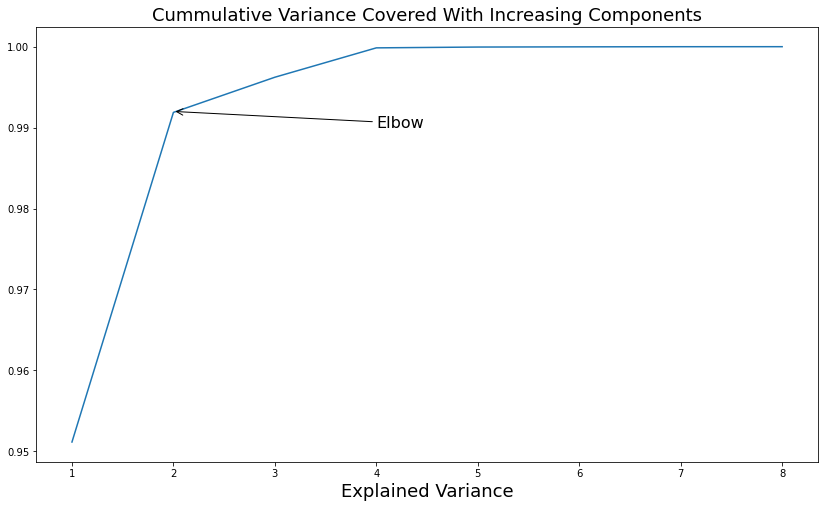

In [288]:
plt.figure(figsize = (14, 8))
x = np.arange(1, 9, 1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.plot(x, y)
plt.title("Cummulative Variance Covered With Increasing Components", size = 18)
plt.xlabel("Number of Components", size = 18)
plt.xlabel("Explained Variance", size = 18)
plt.annotate("Elbow", xy=(2, 0.992), xytext=(4, 0.99),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.show()

#### We can see that the first component itself shows an explained variance of close to 0.95. Beyond that the returns diminish, i.e. it is a game of diminishing returns.
#### a nice elbow is formed at n_components = 2 and it covers more than 0.99 variance. Thus this can be a good value of number of components to take. We will try with values 3, 2, 1.

### components = 3

In [252]:
pca = PCA(n_components = 3)

In [253]:
X_train_pca = pca.fit_transform(X_train)

In [254]:
X_train_pca

array([[-29.87149488,  -7.33061149,  -2.55714307],
       [128.84018335,   7.95187664,   2.3774076 ],
       [101.61519687, -14.5656065 ,   1.26145097],
       ...,
       [198.15987706,   2.19528506,   4.43232668],
       [-52.24352872,  19.33585828,  -1.84244603],
       [215.36066989,   8.25467934,   8.16915869]])

In [255]:
X_train_pca = pd.DataFrame(X_train_pca, index = X_train.index)

In [256]:
X_train_pca

0          1         2
14453  -29.871495  -7.330611 -2.557143
15797  128.840183   7.951877  2.377408
4510   101.615197 -14.565607  1.261451
11899  119.850180   3.181922 -0.254038
895    -23.429565 -20.697547 -6.181596
...           ...        ...       ...
11284  -93.308893   8.226495  5.377599
11964  -80.580573  -1.232088  4.909898
5390   198.159877   2.195285  4.432327
860    -52.243529  19.335858 -1.842446
15795  215.360670   8.254679  8.169159

[11913 rows x 3 columns]

In [257]:
X_train_pca.shape

(11913, 3)

In [258]:
y_train.shape

(11913,)

In [259]:
X_train_pca[3] = y_train

In [260]:
X_train_pca[3].value_counts()

0    11706
1      207
Name: 3, dtype: int64

In [261]:
X_train_pca.shape

(11913, 4)

In [262]:
X_train_pca

0          1         2  3
14453  -29.871495  -7.330611 -2.557143  0
15797  128.840183   7.951877  2.377408  0
4510   101.615197 -14.565607  1.261451  0
11899  119.850180   3.181922 -0.254038  0
895    -23.429565 -20.697547 -6.181596  0
...           ...        ...       ... ..
11284  -93.308893   8.226495  5.377599  0
11964  -80.580573  -1.232088  4.909898  0
5390   198.159877   2.195285  4.432327  0
860    -52.243529  19.335858 -1.842446  0
15795  215.360670   8.254679  8.169159  0

[11913 rows x 4 columns]

In [263]:
X_train_pca.shape

(11913, 4)

In [264]:
pca.components_

array([[-1.22311974e-02, -5.20366346e-03,  1.53581590e-04,
         5.68129856e-04, -1.98294500e-02, -6.95036433e-02,
         3.79824138e-02,  9.96572298e-01],
       [ 9.85953464e-01,  1.61783397e-01, -1.48694565e-02,
        -3.37160496e-02,  5.40080145e-03,  1.15281623e-02,
        -2.57154891e-03,  1.39766221e-02],
       [-7.69019037e-02,  3.82907189e-01,  8.95541367e-04,
        -3.44370570e-02,  2.80496339e-01,  8.69786478e-01,
        -7.83094354e-02,  7.03021183e-02]])

In [265]:
pca.explained_variance_ratio_

array([0.9511492 , 0.04073264, 0.00434462])

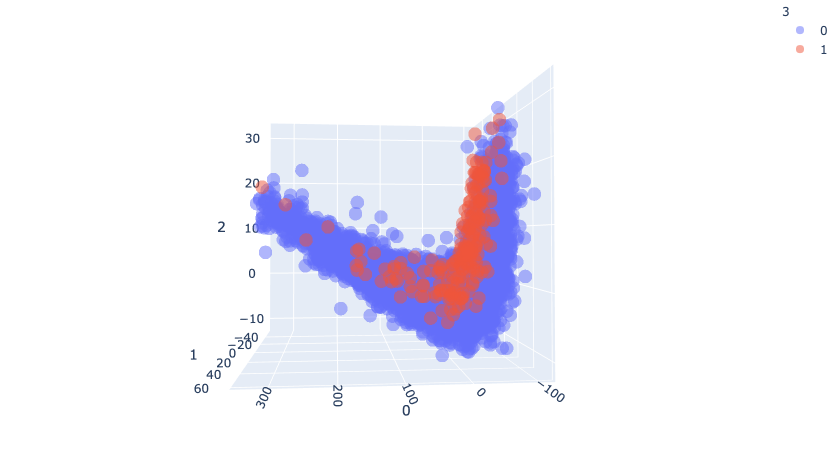

In [280]:
import plotly.express as px
import psutil
fig = px.scatter_3d(X_train_pca, x=0, y=1, z=2, color = 3, size_max=18,
            opacity=0.5)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
# fig.write_image('3d.png')

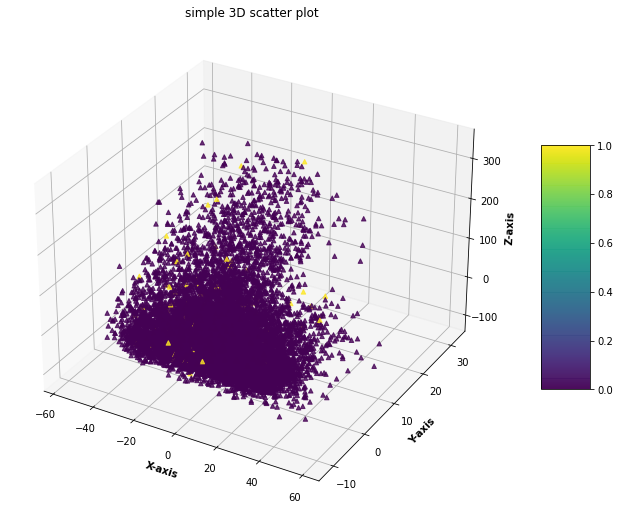

In [81]:
from mpl_toolkits import mplot3d
 
# Creating dataset
z = X_train_pca[0]
x = X_train_pca[1]
y = X_train_pca[2]
c = X_train_pca[3]
 
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.3, alpha = 0.2)
  
# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = c,        
                    marker ='^')
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
 
# show plot
plt.show()

In [82]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(weights = 'distance')

In [83]:
clf_knn.fit(X_train_pca.drop([3], axis = 1), y_train)

KNeighborsClassifier(weights='distance')

In [84]:
X_test_pca = pca.transform(X_test)

In [85]:
X_test_pca = pd.DataFrame(X_test_pca, index = X_test.index)

In [86]:
X_test_pca

0          1          2
15985  -35.280383   0.850875  -3.193912
8188   -57.894447 -42.829818  -3.588320
8157    -8.663158 -12.602382  -3.220345
2589  -121.024436 -14.801318  70.377242
11909  -92.958459  -3.512713   1.829783
...           ...        ...        ...
12123   -7.474204 -25.277933  -0.530312
7375    29.415339  15.525221  -2.317853
3425   -59.882114  -4.360795  -2.346654
10604  -51.447204 -24.760014  -1.753605
1323  -114.260099 -64.140090  34.388162

[3580 rows x 3 columns]

In [87]:
y_pred = clf_knn.predict(X_test_pca)

In [88]:
from sklearn.metrics import confusion_matrix, classification_report

In [89]:
confusion_matrix(y_test, y_pred)

array([[3238,   21],
       [  95,  226]])

In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3259
           1       0.91      0.70      0.80       321

    accuracy                           0.97      3580
   macro avg       0.94      0.85      0.89      3580
weighted avg       0.97      0.97      0.97      3580



#### With 3 components, recall for the postitive class dropped to 70%. We are able to see that as we reduce the number of components, some of loss of information takes place and the desired recall value is reducing. 

### components = 2

In [289]:
pca = PCA(n_components = 2)

In [290]:
X_train_pca = pca.fit_transform(X_train)

In [291]:
X_train_pca

array([[-29.87149488,  -7.33061149],
       [128.84018335,   7.95187664],
       [101.61519687, -14.5656065 ],
       ...,
       [198.15987706,   2.19528506],
       [-52.24352872,  19.33585828],
       [215.36066989,   8.25467934]])

In [292]:
X_train_pca = pd.DataFrame(X_train_pca, index = X_train.index)

In [293]:
X_train_pca

0          1
14453  -29.871495  -7.330611
15797  128.840183   7.951877
4510   101.615197 -14.565607
11899  119.850180   3.181922
895    -23.429565 -20.697547
...           ...        ...
11284  -93.308893   8.226495
11964  -80.580573  -1.232088
5390   198.159877   2.195285
860    -52.243529  19.335858
15795  215.360670   8.254679

[11913 rows x 2 columns]

In [294]:
X_train_pca.shape

(11913, 2)

In [295]:
y_train.shape

(11913,)

In [296]:
X_train_pca[2] = y_train

In [297]:
X_train_pca[2].value_counts()

0    11706
1      207
Name: 2, dtype: int64

In [298]:
X_train_pca.shape

(11913, 3)

In [299]:
X_train_pca

0          1  2
14453  -29.871495  -7.330611  0
15797  128.840183   7.951877  0
4510   101.615197 -14.565607  0
11899  119.850180   3.181922  0
895    -23.429565 -20.697547  0
...           ...        ... ..
11284  -93.308893   8.226495  0
11964  -80.580573  -1.232088  0
5390   198.159877   2.195285  0
860    -52.243529  19.335858  0
15795  215.360670   8.254679  0

[11913 rows x 3 columns]

In [300]:
X_train_pca.shape

(11913, 3)

In [301]:
pca.components_

array([[-1.22311974e-02, -5.20366346e-03,  1.53581590e-04,
         5.68129856e-04, -1.98294500e-02, -6.95036433e-02,
         3.79824138e-02,  9.96572298e-01],
       [ 9.85953464e-01,  1.61783397e-01, -1.48694565e-02,
        -3.37160496e-02,  5.40080145e-03,  1.15281623e-02,
        -2.57154891e-03,  1.39766221e-02]])

In [302]:
pca.explained_variance_ratio_

array([0.9511492 , 0.04073264])

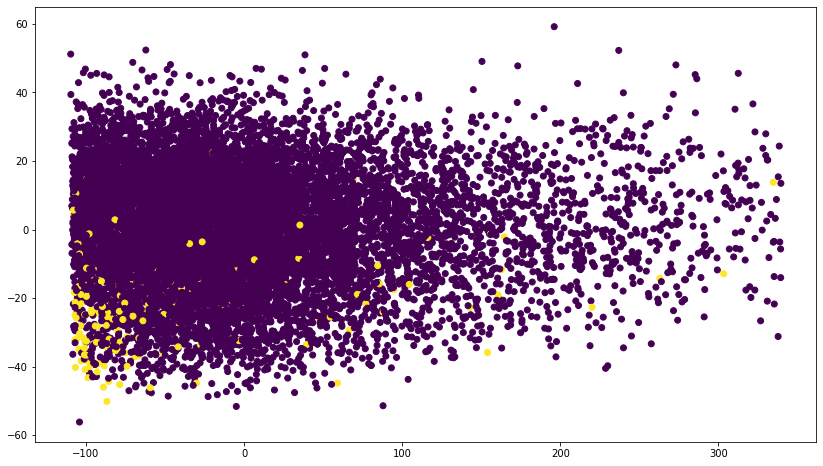

In [303]:
plt.figure(figsize = (14, 8))
plt.scatter(X_train_pca[0], X_train_pca[1], c = X_train_pca[2])
plt.show()

In [304]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(weights = 'distance')

In [251]:
clf_knn.fit(X_train_pca.drop([2], axis = 1), y_train)

KNeighborsClassifier(weights='distance')

In [108]:
X_test_pca = pca.transform(X_test)

In [109]:
X_test_pca = pd.DataFrame(X_test_pca, index = X_test.index)

In [110]:
X_test_pca

0          1
15985  -35.280383   0.850875
8188   -57.894447 -42.829818
8157    -8.663158 -12.602382
2589  -121.024436 -14.801318
11909  -92.958459  -3.512713
...           ...        ...
12123   -7.474204 -25.277933
7375    29.415339  15.525221
3425   -59.882114  -4.360795
10604  -51.447204 -24.760014
1323  -114.260099 -64.140090

[3580 rows x 2 columns]

In [111]:
y_pred = clf_knn.predict(X_test_pca)

In [112]:
from sklearn.metrics import confusion_matrix, classification_report

In [113]:
confusion_matrix(y_test, y_pred)

array([[3232,   27],
       [ 117,  204]])

In [114]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3259
           1       0.88      0.64      0.74       321

    accuracy                           0.96      3580
   macro avg       0.92      0.81      0.86      3580
weighted avg       0.96      0.96      0.96      3580



#### With 2 components, recall for the postitive class dropped further to 64%. We are able to see that as we reduce the number of components, some of loss of information takes place and the desired recall value is reducing. 

### components = 1

In [115]:
pca = PCA(n_components = 1)

In [116]:
X_train_pca = pca.fit_transform(X_train)

In [117]:
X_train_pca

array([[-29.87149488],
       [128.84018335],
       [101.61519687],
       ...,
       [198.15987706],
       [-52.24352872],
       [215.36066989]])

In [118]:
X_train_pca = pd.DataFrame(X_train_pca, index = X_train.index)

In [119]:
X_train_pca

0
14453  -29.871495
15797  128.840183
4510   101.615197
11899  119.850180
895    -23.429565
...           ...
11284  -93.308893
11964  -80.580573
5390   198.159877
860    -52.243529
15795  215.360670

[11913 rows x 1 columns]

In [120]:
X_train_pca.shape

(11913, 1)

In [121]:
y_train.shape

(11913,)

In [122]:
X_train_pca[1] = y_train

In [123]:
X_train_pca[1].value_counts()

0    11706
1      207
Name: 1, dtype: int64

In [124]:
X_train_pca.shape

(11913, 2)

In [125]:
X_train_pca[2] = 0
X_train_pca

0  1  2
14453  -29.871495  0  0
15797  128.840183  0  0
4510   101.615197  0  0
11899  119.850180  0  0
895    -23.429565  0  0
...           ... .. ..
11284  -93.308893  0  0
11964  -80.580573  0  0
5390   198.159877  0  0
860    -52.243529  0  0
15795  215.360670  0  0

[11913 rows x 3 columns]

In [126]:
pca.components_

array([[-1.22311974e-02, -5.20366346e-03,  1.53581590e-04,
         5.68129856e-04, -1.98294500e-02, -6.95036433e-02,
         3.79824138e-02,  9.96572298e-01]])

In [127]:
pca.explained_variance_ratio_

array([0.9511492])

### 1 component cover roughly 95% variance.

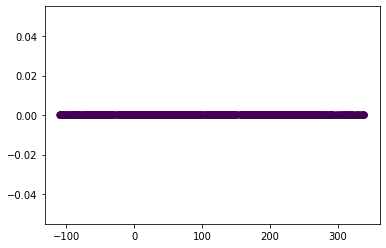

In [128]:
plt.scatter(X_train_pca[0], X_train_pca[2], c = X_train_pca[1])

In [129]:
X_test_pca = pca.transform(X_test)

### Fit with SVC after PCA

### components = 1

In [130]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(weights = 'distance')

In [131]:
clf_knn.fit(X_train_pca.drop([1, 2], axis = 1), y_train)

KNeighborsClassifier(weights='distance')

In [132]:
y_pred = clf_knn.predict(X_test_pca)

In [133]:
from sklearn.metrics import confusion_matrix, classification_report

In [134]:
confusion_matrix(y_test, y_pred)

array([[3232,   27],
       [ 314,    7]])

In [135]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      3259
           1       0.21      0.02      0.04       321

    accuracy                           0.90      3580
   macro avg       0.56      0.51      0.49      3580
weighted avg       0.85      0.90      0.87      3580



#### Same pattern continues. Precision of positive class has dropped further, here, recall has dropped heavily.
#### As we have seen, PCA is about tradeoff. The lower the number of components that we select, the higher the variance loss is going to be there but we improve model efficiency and runtime. 
#### We plot the explained variance vs components to get an idea of what n_component value we should go for that minimises this trade off.

### PCA: With scaled Attributes

In [136]:
from sklearn.decomposition import PCA

#### First trying components = number of attributes

In [137]:
pca = PCA(n_components = 8)

In [138]:
X_train_pca = pca.fit_transform(X_train_prepared)

In [139]:
X_train_pca

array([[ 1.89590682e-01, -5.45378118e-02,  3.35521114e-01, ...,
        -9.74936217e-02,  6.38395129e-02, -3.55920976e-02],
       [-1.96950366e+00, -1.86349175e+00,  3.36977799e-01, ...,
         1.45707877e-01,  3.14622671e-03, -1.52904668e-02],
       [-2.33475422e+00, -8.35368401e-02,  1.65746027e-01, ...,
        -5.62662294e-02, -2.46517657e-01, -1.62658144e-01],
       ...,
       [-3.60396390e+00, -2.61501493e-01,  4.13827685e-01, ...,
        -9.83542534e-01, -2.21504244e-01, -7.74707041e-02],
       [ 1.44890777e+00, -1.30620544e+00, -5.35016065e-01, ...,
         2.42058566e-02,  1.44834926e-02, -5.61673882e-03],
       [-3.26140316e+00, -1.64664794e+00,  7.09723568e-01, ...,
        -8.13668367e-02, -2.54878523e-01, -7.38923404e-02]])

In [140]:
pca.explained_variance_ratio_

array([0.44584179, 0.35219551, 0.10083851, 0.05905177, 0.02087168,
       0.01350203, 0.00665047, 0.00104824])

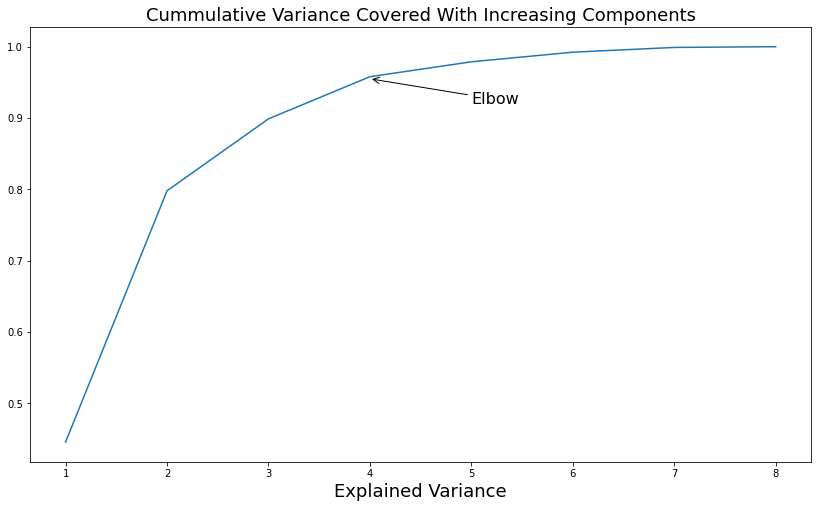

In [141]:
plt.figure(figsize = (14, 8))
x = np.arange(1, 9, 1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.plot(x, y)
plt.title("Cummulative Variance Covered With Increasing Components", size = 18)
plt.xlabel("Number of Components", size = 18)
plt.xlabel("Explained Variance", size = 18)
plt.annotate("Elbow", xy=(4, 0.955), xytext=(5, 0.92),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.show()

#### We can see that the first component itself shows an explained variance of close to 45% variance and second component covers around 35% variance. Beyond that the returns diminish, i.e. it is a game of diminishing returns.
#### a nice elbow is formed at n_components = 4 and it covers more than 0.94 variance. Thus this can be a good value of number of components to take. We will try with values 4, 3, 2, 1.

### components = 4

In [142]:
pca = PCA(n_components = 4)

In [143]:
X_train_pca = pca.fit_transform(X_train_prepared)

In [144]:
X_train_pca

array([[ 0.18959068, -0.05453781,  0.33552111, -0.52411195],
       [-1.96950366, -1.86349175,  0.3369778 ,  0.5841368 ],
       [-2.33475422, -0.08353684,  0.16574603,  0.48679738],
       ...,
       [-3.6039639 , -0.26150149,  0.41382768,  1.38740721],
       [ 1.44890777, -1.30620544, -0.53501606, -0.32411982],
       [-3.26140316, -1.64664794,  0.70972357,  1.58599107]])

In [145]:
X_train_pca = pd.DataFrame(X_train_pca, index = X_train.index)

In [146]:
X_train_pca

0         1         2         3
14453  0.189591 -0.054538  0.335521 -0.524112
15797 -1.969504 -1.863492  0.336978  0.584137
4510  -2.334754 -0.083537  0.165746  0.486797
11899 -2.486465 -0.242216 -0.994099  0.753514
895   -1.019712  2.626192 -1.240156 -0.355715
...         ...       ...       ...       ...
11284  3.235008 -0.602643  0.407201  0.165589
11964  2.237941  0.773286  0.007441  0.249128
5390  -3.603964 -0.261501  0.413828  1.387407
860    1.448908 -1.306205 -0.535016 -0.324120
15795 -3.261403 -1.646648  0.709724  1.585991

[11913 rows x 4 columns]

In [147]:
X_train_pca.shape

(11913, 4)

In [148]:
y_train.shape

(11913,)

In [149]:
X_train_pca[4] = y_train

In [150]:
X_train_pca[4].value_counts()

0    11706
1      207
Name: 4, dtype: int64

In [151]:
X_train_pca.shape

(11913, 5)

In [152]:
X_train_pca

0         1         2         3  4
14453  0.189591 -0.054538  0.335521 -0.524112  0
15797 -1.969504 -1.863492  0.336978  0.584137  0
4510  -2.334754 -0.083537  0.165746  0.486797  0
11899 -2.486465 -0.242216 -0.994099  0.753514  0
895   -1.019712  2.626192 -1.240156 -0.355715  0
...         ...       ...       ...       ... ..
11284  3.235008 -0.602643  0.407201  0.165589  0
11964  2.237941  0.773286  0.007441  0.249128  0
5390  -3.603964 -0.261501  0.413828  1.387407  0
860    1.448908 -1.306205 -0.535016 -0.324120  0
15795 -3.261403 -1.646648  0.709724  1.585991  0

[11913 rows x 5 columns]

In [153]:
X_train_pca.shape

(11913, 5)

In [154]:
pca.components_

array([[ 0.18083325,  0.18808255, -0.1687813 , -0.1886981 ,  0.45957364,
         0.47035146, -0.48048318, -0.45224735],
       [-0.4654355 , -0.41664848,  0.47781113,  0.50010405,  0.17245594,
         0.18369723, -0.18644817, -0.18198255],
       [-0.48297958,  0.64906515,  0.47235971, -0.34381081,  0.02324602,
         0.01552843,  0.03752242,  0.04388794],
       [ 0.05619839, -0.01179715, -0.00837718,  0.06192554,  0.55072296,
         0.43079691,  0.37818604,  0.60074219]])

In [155]:
pca.explained_variance_ratio_

array([0.44584179, 0.35219551, 0.10083851, 0.05905177])

Just the 3 components considered in plot as 4d can not be plotted

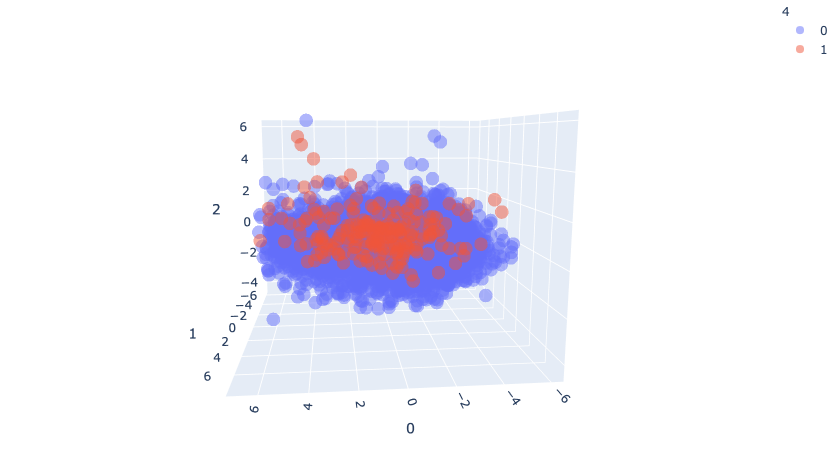

In [156]:
import plotly.express as px
fig = px.scatter_3d(X_train_pca, x=0, y=1, z=2, color = 4, size_max=18,
            opacity=0.5)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

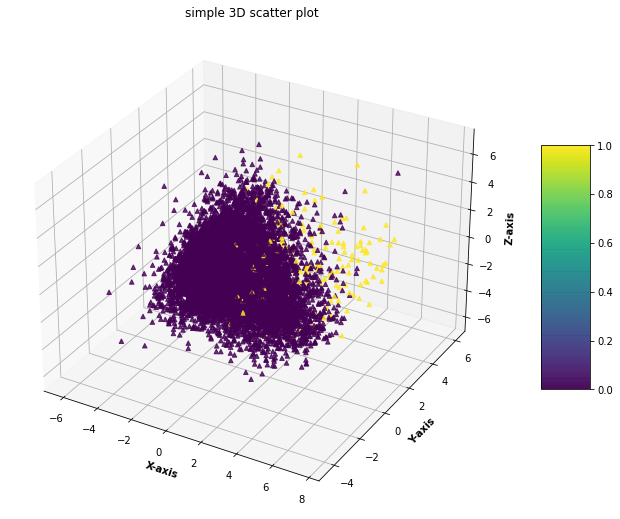

In [157]:
from mpl_toolkits import mplot3d
 
# Creating dataset
z = X_train_pca[0]
x = X_train_pca[1]
y = X_train_pca[2]
c = X_train_pca[4]
 
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.3, alpha = 0.2)
  
# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = c,        
                    marker ='^')
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
 
# show plot
plt.show()

In [158]:
X_test_pca = pca.transform(X_test_prepared)

### Fit with KNN after PCA

### components = 4

In [159]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(weights = 'distance')

In [160]:
clf_knn.fit(X_train_pca.drop(4, axis = 1), y_train)

KNeighborsClassifier(weights='distance')

In [161]:
y_pred = clf_knn.predict(X_test_pca)

In [162]:
from sklearn.metrics import confusion_matrix, classification_report

In [163]:
confusion_matrix(y_test, y_pred)

array([[3248,   11],
       [  69,  252]])

In [164]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3259
           1       0.96      0.79      0.86       321

    accuracy                           0.98      3580
   macro avg       0.97      0.89      0.93      3580
weighted avg       0.98      0.98      0.98      3580



#### In PCA after scaling the data, even after reducing the components to just 4, the recall value for positive class is maintained at without pca levels. 

### components = 3

In [165]:
pca = PCA(n_components = 3)

In [166]:
X_train_pca = pca.fit_transform(X_train_prepared)

In [167]:
X_train_pca

array([[ 0.18959068, -0.05453781,  0.33552111],
       [-1.96950366, -1.86349175,  0.3369778 ],
       [-2.33475422, -0.08353684,  0.16574603],
       ...,
       [-3.6039639 , -0.26150149,  0.41382768],
       [ 1.44890777, -1.30620544, -0.53501606],
       [-3.26140316, -1.64664794,  0.70972357]])

In [168]:
X_train_pca = pd.DataFrame(X_train_pca, index = X_train.index)

In [169]:
X_train_pca

0         1         2
14453  0.189591 -0.054538  0.335521
15797 -1.969504 -1.863492  0.336978
4510  -2.334754 -0.083537  0.165746
11899 -2.486465 -0.242216 -0.994099
895   -1.019712  2.626192 -1.240156
...         ...       ...       ...
11284  3.235008 -0.602643  0.407201
11964  2.237941  0.773286  0.007441
5390  -3.603964 -0.261501  0.413828
860    1.448908 -1.306205 -0.535016
15795 -3.261403 -1.646648  0.709724

[11913 rows x 3 columns]

In [170]:
X_train_pca.shape

(11913, 3)

In [171]:
y_train.shape

(11913,)

In [172]:
X_train_pca[3] = y_train

In [173]:
X_train_pca[3].value_counts()

0    11706
1      207
Name: 3, dtype: int64

In [174]:
X_train_pca.shape

(11913, 4)

In [175]:
X_train_pca

0         1         2  3
14453  0.189591 -0.054538  0.335521  0
15797 -1.969504 -1.863492  0.336978  0
4510  -2.334754 -0.083537  0.165746  0
11899 -2.486465 -0.242216 -0.994099  0
895   -1.019712  2.626192 -1.240156  0
...         ...       ...       ... ..
11284  3.235008 -0.602643  0.407201  0
11964  2.237941  0.773286  0.007441  0
5390  -3.603964 -0.261501  0.413828  0
860    1.448908 -1.306205 -0.535016  0
15795 -3.261403 -1.646648  0.709724  0

[11913 rows x 4 columns]

In [176]:
X_train_pca.shape

(11913, 4)

In [177]:
pca.components_

array([[ 0.18083325,  0.18808255, -0.1687813 , -0.1886981 ,  0.45957364,
         0.47035146, -0.48048318, -0.45224735],
       [-0.4654355 , -0.41664848,  0.47781113,  0.50010405,  0.17245594,
         0.18369723, -0.18644817, -0.18198255],
       [-0.48297958,  0.64906515,  0.47235971, -0.34381081,  0.02324602,
         0.01552843,  0.03752242,  0.04388794]])

In [178]:
pca.explained_variance_ratio_

array([0.44584179, 0.35219551, 0.10083851])

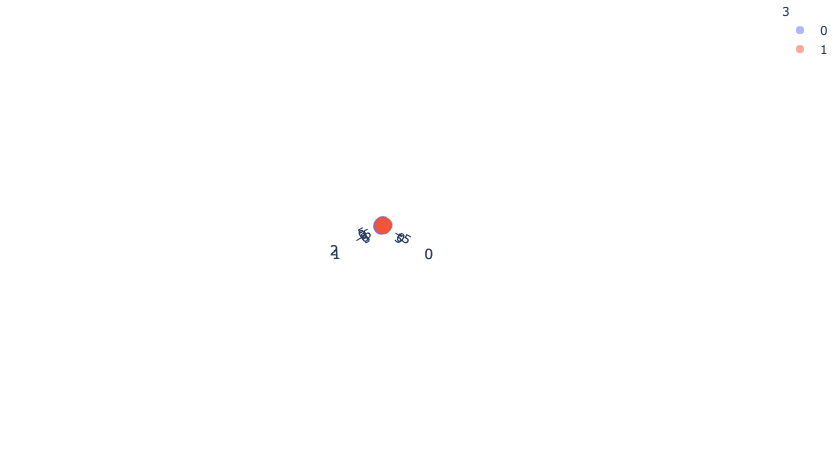

In [179]:
import plotly.express as px
fig = px.scatter_3d(X_train_pca, x=0, y=1, z=2, color = 3, size_max=18,
            opacity=0.5)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

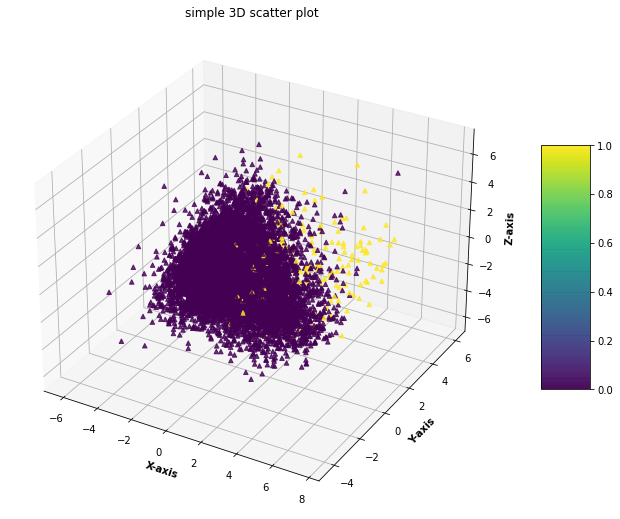

In [180]:
from mpl_toolkits import mplot3d
 
# Creating dataset
z = X_train_pca[0]
x = X_train_pca[1]
y = X_train_pca[2]
c = X_train_pca[3]
 
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.3, alpha = 0.2)
  
# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = c,        
                    marker ='^')
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
 
# show plot
plt.show()

In [181]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(weights = 'distance')

In [182]:
clf_knn.fit(X_train_pca.drop([3], axis = 1), y_train)

KNeighborsClassifier(weights='distance')

In [183]:
X_test_pca = pca.transform(X_test_prepared)

In [184]:
X_test_pca = pd.DataFrame(X_test_pca, index = X_test.index)

In [185]:
X_test_pca

0          1         2
15985   0.443977  -0.436815  0.297741
8188   -2.732565  10.011325 -0.668190
8157   -0.763810   0.901485  0.626366
2589   20.111581   9.906482  2.292114
11909   2.269189   0.883322  0.348346
...          ...        ...       ...
12123  -0.673012   0.793128  1.800913
7375   -0.271556  -2.136397  0.001451
3425    0.842889   0.284980 -0.068697
10604  -0.139287   2.025718  1.712509
1323    3.481494  20.739880 -0.991317

[3580 rows x 3 columns]

In [186]:
y_pred = clf_knn.predict(X_test_pca)

In [187]:
from sklearn.metrics import confusion_matrix, classification_report

In [188]:
confusion_matrix(y_test, y_pred)

array([[3245,   14],
       [  66,  255]])

In [189]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3259
           1       0.95      0.79      0.86       321

    accuracy                           0.98      3580
   macro avg       0.96      0.90      0.93      3580
weighted avg       0.98      0.98      0.98      3580



#### Recall value is maintained even with 3 components considered for pca transforming the data.

### components = 2

In [190]:
pca = PCA(n_components = 2)

In [191]:
X_train_pca = pca.fit_transform(X_train_prepared)

In [192]:
X_train_pca

array([[ 0.18959068, -0.05453781],
       [-1.96950366, -1.86349175],
       [-2.33475422, -0.08353684],
       ...,
       [-3.6039639 , -0.26150149],
       [ 1.44890777, -1.30620544],
       [-3.26140316, -1.64664794]])

In [193]:
X_train_pca = pd.DataFrame(X_train_pca, index = X_train.index)

In [194]:
X_train_pca

0         1
14453  0.189591 -0.054538
15797 -1.969504 -1.863492
4510  -2.334754 -0.083537
11899 -2.486465 -0.242216
895   -1.019712  2.626192
...         ...       ...
11284  3.235008 -0.602643
11964  2.237941  0.773286
5390  -3.603964 -0.261501
860    1.448908 -1.306205
15795 -3.261403 -1.646648

[11913 rows x 2 columns]

In [195]:
X_train_pca.shape

(11913, 2)

In [196]:
y_train.shape

(11913,)

In [197]:
X_train_pca[2] = y_train

In [198]:
X_train_pca[2].value_counts()

0    11706
1      207
Name: 2, dtype: int64

In [199]:
X_train_pca.shape

(11913, 3)

In [200]:
X_train_pca

0         1  2
14453  0.189591 -0.054538  0
15797 -1.969504 -1.863492  0
4510  -2.334754 -0.083537  0
11899 -2.486465 -0.242216  0
895   -1.019712  2.626192  0
...         ...       ... ..
11284  3.235008 -0.602643  0
11964  2.237941  0.773286  0
5390  -3.603964 -0.261501  0
860    1.448908 -1.306205  0
15795 -3.261403 -1.646648  0

[11913 rows x 3 columns]

In [201]:
X_train_pca.shape

(11913, 3)

In [202]:
pca.components_

array([[ 0.18083325,  0.18808255, -0.1687813 , -0.1886981 ,  0.45957364,
         0.47035146, -0.48048318, -0.45224735],
       [-0.4654355 , -0.41664848,  0.47781113,  0.50010405,  0.17245594,
         0.18369723, -0.18644817, -0.18198255]])

In [203]:
pca.explained_variance_ratio_

array([0.44584179, 0.35219551])

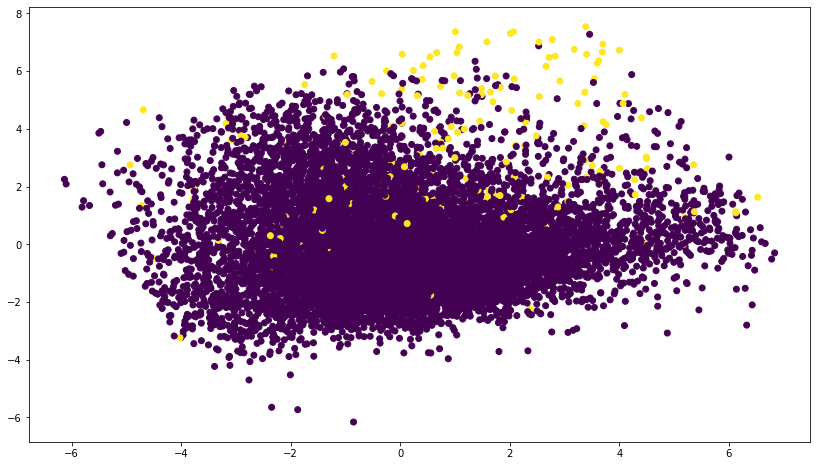

In [204]:
plt.figure(figsize = (14, 8))
plt.scatter(X_train_pca[0], X_train_pca[1], c = X_train_pca[2])
plt.show()

In [205]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(weights = 'distance')

In [206]:
clf_knn.fit(X_train_pca.drop([2], axis = 1), y_train)

KNeighborsClassifier(weights='distance')

In [207]:
X_test_pca = pca.transform(X_test_prepared)

In [208]:
X_test_pca = pd.DataFrame(X_test_pca, index = X_test.index)

In [209]:
X_test_pca

0          1
15985   0.443977  -0.436815
8188   -2.732565  10.011325
8157   -0.763810   0.901485
2589   20.111581   9.906482
11909   2.269189   0.883322
...          ...        ...
12123  -0.673012   0.793128
7375   -0.271556  -2.136397
3425    0.842889   0.284980
10604  -0.139287   2.025718
1323    3.481494  20.739880

[3580 rows x 2 columns]

In [210]:
y_pred = clf_knn.predict(X_test_pca)

In [211]:
from sklearn.metrics import confusion_matrix, classification_report

In [212]:
confusion_matrix(y_test, y_pred)

array([[3235,   24],
       [  74,  247]])

In [213]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3259
           1       0.91      0.77      0.83       321

    accuracy                           0.97      3580
   macro avg       0.94      0.88      0.91      3580
weighted avg       0.97      0.97      0.97      3580



#### With 2 components, recall for the postitive class dropped further to 77%. We are able to see that as we reduce the number of components, some of loss of information takes place and the desired recall value is reducing. However this is still so much better than the pca without scaling attributes prior. Also the drop is not as high as the potential efficiency improvements through data reduction.

### components = 1

In [214]:
pca = PCA(n_components = 1)

In [215]:
X_train_pca = pca.fit_transform(X_train_prepared)

In [216]:
X_train_pca

array([[ 0.18959068],
       [-1.96950366],
       [-2.33475422],
       ...,
       [-3.6039639 ],
       [ 1.44890777],
       [-3.26140316]])

In [217]:
X_train_pca = pd.DataFrame(X_train_pca, index = X_train.index)

In [218]:
X_train_pca

0
14453  0.189591
15797 -1.969504
4510  -2.334754
11899 -2.486465
895   -1.019712
...         ...
11284  3.235008
11964  2.237941
5390  -3.603964
860    1.448908
15795 -3.261403

[11913 rows x 1 columns]

In [219]:
X_train_pca.shape

(11913, 1)

In [220]:
y_train.shape

(11913,)

In [221]:
X_train_pca[1] = y_train

In [222]:
X_train_pca[1].value_counts()

0    11706
1      207
Name: 1, dtype: int64

In [223]:
X_train_pca.shape

(11913, 2)

In [224]:
X_train_pca[2] = 0
X_train_pca

0  1  2
14453  0.189591  0  0
15797 -1.969504  0  0
4510  -2.334754  0  0
11899 -2.486465  0  0
895   -1.019712  0  0
...         ... .. ..
11284  3.235008  0  0
11964  2.237941  0  0
5390  -3.603964  0  0
860    1.448908  0  0
15795 -3.261403  0  0

[11913 rows x 3 columns]

In [225]:
pca.components_

array([[ 0.18083325,  0.18808255, -0.1687813 , -0.1886981 ,  0.45957364,
         0.47035146, -0.48048318, -0.45224735]])

In [226]:
pca.explained_variance_ratio_

array([0.44584179])

### 1 component cover roughly 95% variance.

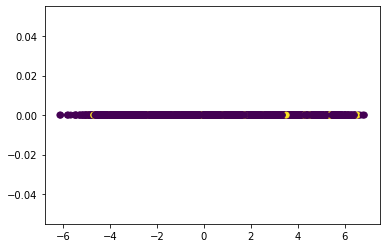

In [227]:
plt.scatter(X_train_pca[0], X_train_pca[2], c = X_train_pca[1])

In [228]:
X_test_pca = pca.transform(X_test_prepared)

### Fit with SVC after PCA

### components = 1

In [229]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(weights = 'distance')

In [230]:
clf_knn.fit(X_train_pca.drop([1, 2], axis = 1), y_train)

KNeighborsClassifier(weights='distance')

In [231]:
y_pred = clf_knn.predict(X_test_pca)

In [232]:
from sklearn.metrics import confusion_matrix, classification_report

In [233]:
confusion_matrix(y_test, y_pred)

array([[3233,   26],
       [ 318,    3]])

In [234]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      3259
           1       0.10      0.01      0.02       321

    accuracy                           0.90      3580
   macro avg       0.51      0.50      0.48      3580
weighted avg       0.84      0.90      0.87      3580



#### Very poor results for just 1 component PCA.